In [1]:
# Step 1. 인물모드 직접 해보기
# 최소 3장 이상의 인물모드 사진
## blur, 배경 교체 크로마키

def selfie_with_blur():# blur
    import os
    import urllib
    import cv2
    import numpy as np
    from pixellib.semantic import semantic_segmentation
    from matplotlib import pyplot as plt
    # warning 메시지 무시하기
    import warnings
    warnings.filterwarnings(action='ignore')
        
    # 이미지 읽기
    img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image.png'
    img_orig = cv2.imread(img_path)
    
    # 모델 저장 경로
    model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
    # 모델 파일 저장 경로
    model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
      
    # segmentation 모델 생성
    model = semantic_segmentation()
    # .h5 파일 이용해서 모델 로드
    model.load_pascalvoc_model(model_file)
        
    # 원본 이미지에 대한 segment값 추출 (model 이용해서)
    segvalues, output = model.segmentAsPascalvoc(img_path)
        
    # segmentation 컬러 설정; BRG 채널 기준으로 세팅
    seg_color = (128,128,192)
    
    # seg_color로 구성된 마스크 만들기
    seg_map = np.all(output==seg_color, axis=-1)
    
    # True: 255, False: 0으로 세팅
    img_mask = seg_map.astype(np.uint8) * 255

    # img_mask의 색상을 colormap 형태로 변경
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

    # 블러된 이미지 만들기
    blur_kernel_size = (15, 15)
    img_orig_blur = cv2.blur(img_orig, blur_kernel_size)

    # 흐려진 이미지에서 배경만 추출
    ## segmenation mask 사용
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    
    # segmentation mask의 이미지 반전
    img_bg_mask = cv2.bitwise_not(img_mask_color)
    
    # 배경 추출; blur된 배경만 획득함
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)

    # 배경 영상과 사람 영상 합치기
    img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
    
    # 합쳐진 이미지 확인
    plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    plt.show()

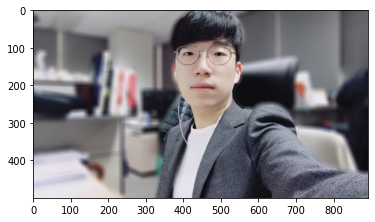

In [2]:
selfie_with_blur()

background
bird
dog


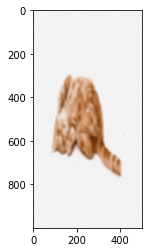

In [2]:
# Step 1. 인물모드 직접 해보기
# 최소 3장 이상의 인물모드 사진
## blur, 배경 교체 크로마키

def cat_img_with_blur():# cat + blur background
    import os
    import urllib
    import cv2
    import numpy as np
    from pixellib.semantic import semantic_segmentation
    from matplotlib import pyplot as plt
    # warning 메시지 무시하기
    import warnings
    warnings.filterwarnings(action='ignore')
    
    # 이미지 읽기
    img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/test_cat.png'
    img_orig = cv2.imread(img_path)
    
#     print(img_orig.shape) # (461, 920, 3) 잡히고..
#     plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
#     plt.show() # 잘 보이고..

    ## 바로 segvalues, output 적용하려니 다음 에러 확인하였음
    ## resize to max dimension of images from training dataset 에러가 발생

    # 이미지를 훈련용 사이즈에 맞게 조절(resize)해주기
    desired_size = (500, 1000)  # 임의 사이즈 지정해봄
    resized_img = cv2.resize(img_orig, desired_size)
    
    # 리사이즈된 이미지를 디스크에 저장
    # 원본 이미지 리사이징하고 그냥 덮어버림
    cv2.imwrite(img_path, resized_img)
    
    
    # 모델 저장 경로
    model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
    # 모델 파일 저장 경로
    model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
      
    # segmentation 모델 생성
    model = semantic_segmentation()
    # .h5 파일 이용해서 모델 로드
    model.load_pascalvoc_model(model_file)
        
    # 원본 이미지에 대한 segment값 추출 (model 이용해서)
    segvalues, output = model.segmentAsPascalvoc(img_path)
    
    # pascalvoc 데이터의 라벨종류
    # 라벨 길이 21 (코드 생략)
    LABEL_NAMES = [
        'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
        'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
        'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
    ]
    
    # segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
    for class_id in segvalues['class_ids']:
        print(LABEL_NAMES[class_id])
        
    # model 결과물(segmented image) 확인
#     plt.imshow(output)
#     plt.show()
        
    # 색상순서 RGB -> BGR
    # Label 3번, bird의 색상
    ## color_map = [128, 128,   0]
    seg_color1 = (0,128,128)
    # Label 12번, dog의 색상
    ## color_map = [ 64,   0, 128]
    seg_color2 = (128,0,64)
    
    # seg_color1로만 이루어진 마스크 만들기
    seg_map1 = np.all(output==seg_color1, axis=-1)
    # 마스크 확인
#     print(seg_map1.shape) 
#     plt.imshow(seg_map1, cmap='gray')
#     plt.show()
    
    # seg_color2로만 이루어진 마스크 만들기
    seg_map2 = np.all(output==seg_color2, axis=-1)
    # 마스크 확인
#     print(seg_map1.shape) 
#     plt.imshow(seg_map2, cmap='gray')
#     plt.show()

    # 원본 이미지 복사
    img_show = img_orig.copy()
    
    # seg_map1로 이루어진 이미지 마스크 값 설정
    # True: 255, False: 0
    img_mask1 = seg_map1.astype(np.uint8) * 255
    
    # 적당한 색상으로 변경 (255와 0값을)
    color_mask1 = cv2.applyColorMap(img_mask1, cv2.COLORMAP_JET)
    
    # seg_map2로이루어진 이미지 마스크 값 설정
    # True: 255, False: 0
    img_mask2 = seg_map2.astype(np.uint8) * 255
    
    # 적당한 색상으로 변경 (255와 0값을)
    color_mask2 = cv2.applyColorMap(img_mask2, cv2.COLORMAP_JET)
    
    # 원본 이미지와 첫번째 마스크 (color_mask1)합쳐보기
    img_show = cv2.addWeighted(img_show, 0.6, color_mask1, 0.4, 0.0)
    
    # 원본 이미지와 두번째 마스크 (color_mask2 합쳐보기
    img_show = cv2.addWeighted(img_show, 0.6, color_mask2, 0.4, 0.0)
    
    # 합쳐진 이미지 확인
#     plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
#     plt.show()

    # 고양이 이미지 blur처리
    img_orig_blur = cv2.blur(img_orig, (13,13))
#     plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
#     plt.show()
    
    # blur된 고양이 이미지에서 배경추출
    ## 이미지 마스크 두개 써보자 (앞에서 두개 검사했으니까..)
    img_mask_color1 = cv2.cvtColor(img_mask1, cv2.COLOR_GRAY2BGR)
    img_mask_color2 = cv2.cvtColor(img_mask2, cv2.COLOR_GRAY2BGR)
    
    # 이미지 마스크들을 이용해서 이미지 반전
    img_bg_mask1 = cv2.bitwise_not(img_mask_color1)
    img_bg_mask2 = cv2.bitwise_not(img_mask_color2)
    
    # img_bg_mask1로 배경 추출
    img_bg_blur1 = cv2.bitwise_and(img_orig_blur, img_bg_mask1)
    # img_bg_mask2로 배경 추출
    img_bg_blur2 = cv2.bitwise_and(img_orig_blur, img_bg_mask2)
    
    # img_bg_mask1에 대한 배경이미지 확인
#     plt.imshow(cv2.cvtColor(img_bg_blur1, cv2.COLOR_BGR2RGB))
#     plt.show()
    
    # img_bg_mask2에 대한 배경이미지 확인
#     plt.imshow(cv2.cvtColor(img_bg_blur2, cv2.COLOR_BGR2RGB))
#     plt.show()

    # 배경과 고양이 이미지 합쳐보기
    ## img_mask 1번으로 처리해서 합치고
    img_concat = np.where(img_mask_color1==255, img_orig, img_bg_blur1)
    ## img_mask 2번으로 처리해서 또 합치고
    img_concat = np.where(img_mask_color2==255, img_concat, img_bg_blur2)
    
    # 결과 확인
    plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    plt.show()
    
cat_img_with_blur()

background
bird
dog


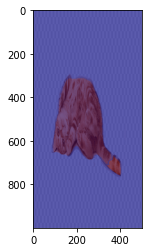

In [4]:
# Step 1. 인물모드 직접 해보기
# 최소 3장 이상의 인물모드 사진
## blur, 배경 교체 크로마키

def cat_img_with_chroma_key():# cat + chroma key
    import os
    import urllib
    import cv2
    import numpy as np
    from pixellib.semantic import semantic_segmentation
    from matplotlib import pyplot as plt
    # warning 메시지 무시하기
    import warnings
    warnings.filterwarnings(action='ignore')
    
    # 이미지 읽기
    img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/test_cat.png'
    img_orig = cv2.imread(img_path)
    
    ## 바로 segvalues, output 적용하려니 다음 에러 확인하였음
    ## resize to max dimension of images from training dataset 에러가 발생

    # 이미지를 훈련용 사이즈에 맞게 조절(resize)해주기
    desired_size = (500, 1000)  # 임의 사이즈 지정해봄
    resized_img = cv2.resize(img_orig, desired_size)
    
    # 리사이즈된 이미지를 디스크에 저장
    # 원본 이미지 리사이징하고 그냥 덮어버림
    cv2.imwrite(img_path, resized_img)
    
    # 모델 저장 경로
    model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
    # 모델 파일 저장 경로
    model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
      
    # segmentation 모델 생성
    model = semantic_segmentation()
    # .h5 파일 이용해서 모델 로드
    model.load_pascalvoc_model(model_file)
        
    # 원본 이미지에 대한 segment값 추출 (model 이용해서)
    segvalues, output = model.segmentAsPascalvoc(img_path)
    
    # pascalvoc 데이터의 라벨종류
    # 라벨 길이 21 (코드 생략)
    LABEL_NAMES = [
        'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
        'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
        'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
    ]
    
    # segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
    for class_id in segvalues['class_ids']:
        print(LABEL_NAMES[class_id])
        
    # model 결과물(segmented image) 확인
#     plt.imshow(output)
#     plt.show()
        
    # 색상순서 RGB -> BGR
    # Label 3번, bird의 색상
    ## color_map = [128, 128,   0]
    seg_color1 = (0,128,128)
    # Label 12번, dog의 색상
    ## color_map = [ 64,   0, 128]
    seg_color2 = (128,0,64)
    
    # seg_color1로만 이루어진 마스크 만들기
    seg_map1 = np.all(output==seg_color1, axis=-1)
    # 마스크 확인
#     print(seg_map1.shape) 
#     plt.imshow(seg_map1, cmap='gray')
#     plt.show()
    
    # seg_color2로만 이루어진 마스크 만들기
    seg_map2 = np.all(output==seg_color2, axis=-1)
    # 마스크 확인
#     print(seg_map1.shape) 
#     plt.imshow(seg_map2, cmap='gray')
#     plt.show()

    # 원본 이미지 복사
    img_show = img_orig.copy()
    
    # seg_map1로 이루어진 이미지 마스크 값 설정
    # True: 255, False: 0
    img_mask1 = seg_map1.astype(np.uint8) * 255
    
    # 적당한 색상으로 변경 (255와 0값을)
    color_mask1 = cv2.applyColorMap(img_mask1, cv2.COLORMAP_JET)
    
    # seg_map2로이루어진 이미지 마스크 값 설정
    # True: 255, False: 0
    img_mask2 = seg_map2.astype(np.uint8) * 255
    
    # 적당한 색상으로 변경 (255와 0값을)
    color_mask2 = cv2.applyColorMap(img_mask2, cv2.COLORMAP_JET)
    
    # 원본 이미지와 첫번째 마스크 (color_mask1)합쳐보기
    img_show = cv2.addWeighted(img_show, 0.6, color_mask1, 0.4, 0.0)
    
    # 원본 이미지와 두번째 마스크 (color_mask2 합쳐보기
    img_show = cv2.addWeighted(img_show, 0.6, color_mask2, 0.4, 0.0)
    
    # 합쳐진 이미지 확인
    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    plt.show()

    ## 이미지 배경을 초록색으로 해야하는데..

cat_img_with_chroma_key()

In [ ]:
# Step 2. 사진에서 문제점 찾기
# 어떤 문제가 있는지 표시하기

## 1. selfie_with_blur()에서는 옷 부분이 제대로 segmentation 되지 않음

## 2. img_with_chroma_key()에서는 고양이 이미지를 찌그러뜨렸더니 (resize)
### bird, dog으로 찾아버림..

In [ ]:
# Step 3. 해결 방법을 제안해 보기

"""
Vison transformer를 사용한 알고리즘이 있는것 같다.(SETR)
https://fudan-zvg.github.io/SETR/

transformer 아키텍쳐?
- 딥러닝 아키텍처의 한 유형

"""